In [1]:
import numpy as np
import pandas as pd
import subprocess
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.dates as mdates
from datetime import date, timedelta
import itertools
from scipy.interpolate import interp1d


In [9]:
## directories
user_path = os.path.expanduser('~')

if "mrung" in user_path : 
    exe_dir = os.path.join(user_path, 'Box/NU-malaria-team/projects/binaries/compartments/')
    git_dir = os.path.join(user_path, 'gitrepos/covid-chicago/')
    #plot_path= os.path.join(project_dir,'fitting/') ###need to specify this for yourself
elif 'geickelb1' in user_path:
    project_dir= os.path.join(user_path,'Box/covid_chicago/cms_sim/')
    exe_dir = os.path.join(user_path,'Desktop/compartments/')
    git_dir = os.path.join(user_path, 'Documents/Github/covid-chicago/')
    plot_path= os.path.join(project_dir,'fitting/')

master_channel_list = ['susceptible', 'exposed', 'infectious', 'symptomatic', 'detected',
                       'hospitalized', 'critical', 'death', 'recovered']

first_day = date(2020, 2, 24)

In [67]:
def reprocess(infile, output_fname=None) :

    fname = os.path.join(infile)
    df = pd.read_csv(fname,index_col=0) #skiprows=1)
    df = df.set_index('sampletimes').transpose()
    df = df.reset_index(drop=False)
    df = df.rename(columns={'index' : 'time'})
    df['time'] = df['time'].astype(float)

    channels = [x for x in df.columns.values if '{' in x]
    df = df.rename(columns={
        x : x.split('{')[0] for x in channels
    })

    if output_fname :
        df.to_csv(output_fname)
    return df


In [77]:
infile='trajectories_locale.csv'
fname = os.path.join(infile)
df = pd.read_csv(fname,skiprows=1)
df = df.set_index('sampletimes').transpose()
df = df.reset_index(drop=False)
df = df.rename(columns={'index' : 'time'})
df['time'] = df['time'].astype(float)

channels = [x for x in df.columns.values if '{' in x]
df = df.rename(columns={
    x : x.split('{')[0] for x in channels
})


In [78]:
df

sampletimes,time,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,...,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois
0,0.000000,5223719,5223719,5223719,5223719,5223719,5223719,5223719,5223719,5223719,...,0,0,0,0,0,0,0,0,0,0
1,1.016949,5223670,5223689,5223665,5223692,5223700,5223666,5223687,5223622,5223692,...,4,4,1,2,0,0,1,2,3,3
2,2.033898,5223491,5223531,5223313,5223489,5223621,5223447,5223538,5223168,5223610,...,52,49,51,38,38,26,36,38,34,34
3,3.050847,5222633,5222534,5221544,5222293,5223216,5222022,5222683,5220279,5223074,...,736,771,795,766,805,589,686,855,637,621
4,4.067797,5217091,5216643,5211299,5215769,5220917,5213738,5217071,5202181,5219646,...,11594,12257,12702,11023,12148,9611,10460,13366,9968,9435
5,5.084746,5183602,5180233,5149511,5176170,5207468,5162272,5183660,5096919,5198918,...,83377,86279,88162,81197,85555,75352,78627,90527,76334,74570
6,6.101695,4991969,4970079,4796704,4945911,5128866,4865441,4989383,4518585,5078463,...,248689,253376,256902,244216,251804,234687,238874,259894,235657,233339
7,7.118644,4014716,3923696,3236053,3816252,4681037,3500019,4002771,2396991,4420895,...,490455,496086,500636,483687,494536,471379,478744,505676,473643,470329
8,8.135593,1405202,1282638,616236,1140026,2851319,819690,1387963,239345,2155482,...,792745,799200,803755,783835,796866,768267,777541,809645,771529,767669
9,9.152542,60115,48586,10465,37843,403967,18682,57841,1897,176896,...,1138495,1146650,1151326,1129477,1144298,1111773,1122549,1159244,1115800,1109523


In [64]:
#reprocess('trajectoriesDat_locale.csv')

KeyError: "None of ['time'] are in the columns"

In [5]:
def plot_by_channel(adf) :

    fig = plt.figure(figsize=(8,6))
    allchannels = [x for x in df.columns.values if 'time' not in x]
    palette = sns.color_palette('Set1', len(allchannels))

    axes = [fig.add_subplot(3,3,x+1) for x in range(len(allchannels))]
    fig.subplots_adjust(bottom=0.05, hspace=0.25, right=0.95, left=0.1)
    for c, channel in enumerate(allchannels) :

        mdf = adf.groupby('time')[channel].agg([np.mean]).reset_index()
        ax = axes[c]
        #dates = [first_day + timedelta(days=int(x)) for x in mdf['time']]
        ax.plot(df['time'], mdf['mean'], label=channel, color=palette[c])
        ax.set_title(channel, y=0.8)

    plt.show()

In [34]:
def round_up(n, decimals=0): 
    import math
    multiplier = 10 ** decimals 
    return int(math.ceil(n * multiplier) / multiplier)

def CI_5(x) :
    return np.percentile(x, 5)

def CI_95(x) :
    return np.percentile(x, 95)

def CI_25(x) :
    return np.percentile(x, 25)

def CI_75(x) :
    return np.percentile(x, 75)


In [32]:
def detected_plot(df, allchannels='detected', chicago=True, save=False, plotname="detected_plot"):
    
    """
    plotting function for plotting the detected channel from a trajectories_dat.
    
    inputs:
    df: trajectoriesDat dataframe (pd.dataframe)
    allchannels: single channel name to plot (string, optional)
    chicago: boolean to compare to the chicago_df data (bool, optional)
    save: boolean to save resulting plot (bool, optional)
        plotname: name of saved plot
    """
    #copy dataset and define pallet/fig
    adf= df.copy()
    fig = plt.figure(figsize=(8,6))
    palette = sns.color_palette('Set1', 10)
    
    #make composite key (time,Ki) aggregation for mean and confidence intervals
    mdf = adf.groupby(['time','Ki'])[allchannels].agg([np.mean, CI_5, CI_95, CI_25, CI_75]).reset_index()
    #convert time to dates based off firstday
    mdf['dates']= pd.to_datetime([first_day + timedelta(days=int(x)) for x in mdf['time']])
    
    ## boolean logic to merge chicago dataset in
    if chicago==True:
        mdf=pd.merge(mdf,
                     chicago_df[["Date",'confirmed_cases','cumulative_cases_calc']],
                     left_on='dates',
                     right_on='Date',how='left' )

    ##automating accounting if Ki is >1. if so, plot each Ki independnely, and don't fill in confidence intervals
    if len(df['Ki'].unique())>1:
        
        for element in range(0, len(mdf['Ki'].unique())):
            plt.plot(mdf.loc[(mdf['Ki']==mdf['Ki'].unique()[element]),'dates'],
                     mdf.loc[(mdf['Ki']==mdf['Ki'].unique()[element]),'mean'],
                     label='detected_SEIR_Ki={}'.format(mdf['Ki'].unique()[element]),
                     color=palette[element])
    
    else:
        plt.plot(mdf['dates'], mdf['mean'], label='detected_SEIR', color=palette[0])
        plt.fill_between(mdf['dates'], mdf['CI_5'], mdf['CI_95'],
                        color=palette[0], linewidth=0, alpha=0.2)
        plt.fill_between(mdf['dates'], mdf['CI_25'], mdf['CI_75'],
                        color=palette[0], linewidth=0, alpha=0.4)
        plt.plot(mdf['dates'], mdf['cumulative_cases_calc'], label='detected_reported', color=palette[1])


    #if chicago is true, plot the chicago data
    if chicago==True:
        plt.plot(mdf['dates'], mdf['cumulative_cases_calc'], label='detected_reported')#, color=palette[element+1])

    plt.title('confirmed_cases')#, y=0.8)
    plt.legend()

    ax = plt.gca()

    formatter = mdates.DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.set_xlim(first_day, )
    
    if save==True:
        plt.savefig(os.path.join(plot_path, '{}.png'.format(plotname)))
    plt.show()

    
    
def plot(adf, allchannels = master_channel_list, save=False) :
    """
    Manuela's origional plotting function
    """
    fig = plt.figure(figsize=(8,6))
    #list(df.columns.unique()[1:])
    palette = sns.color_palette('Set1', len(list(adf.columns.unique()[1:]))+1)

    axes = [fig.add_subplot(3,round_up(len(allchannels)/3),x+1) for x in range(len(allchannels))]
    fig.subplots_adjust(bottom=0.05, hspace=0.25, right=0.95, left=0.1)
    for c, channel in enumerate(allchannels) :

        mdf = adf.groupby('time')[channel].agg([np.mean, CI_5, CI_95, CI_25, CI_75]).reset_index()
        ax = axes[c]
        dates = [first_day + timedelta(days=int(x)) for x in mdf['time']]
        ax.plot(dates, mdf['mean'], label=channel, color=palette[c])
        ax.fill_between(dates, mdf['CI_5'], mdf['CI_95'],
                        color=palette[c], linewidth=0, alpha=0.2)
        ax.fill_between(dates, mdf['CI_25'], mdf['CI_75'],
                        color=palette[c], linewidth=0, alpha=0.4)

        ax.set_title(channel, y=0.8)

        formatter = mdates.DateFormatter("%m-%d")
        ax.xaxis.set_major_formatter(formatter)
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.set_xlim(first_day, )
        
        if save==True:
            plt.savefig(os.path.join(plot_path, 'sample_plot.png'))
    plt.show()

In [30]:
def round_up(n, decimals=0): 
    import math
    multiplier = 10 ** decimals 
    return int(math.ceil(n * multiplier) / multiplier)
round_up(10/3)

4

In [57]:
list(df)#['time']

['time',
 'susceptible_Cook',
 'susceptible_Cook',
 'susceptible_Cook',
 'susceptible_Cook',
 'susceptible_Cook',
 'susceptible_Cook',
 'susceptible_Cook',
 'susceptible_Cook',
 'susceptible_Cook',
 'susceptible_Cook',
 'exposed_Cook',
 'exposed_Cook',
 'exposed_Cook',
 'exposed_Cook',
 'exposed_Cook',
 'exposed_Cook',
 'exposed_Cook',
 'exposed_Cook',
 'exposed_Cook',
 'exposed_Cook',
 'infectious_Cook',
 'infectious_Cook',
 'infectious_Cook',
 'infectious_Cook',
 'infectious_Cook',
 'infectious_Cook',
 'infectious_Cook',
 'infectious_Cook',
 'infectious_Cook',
 'infectious_Cook',
 'recovered_Cook',
 'recovered_Cook',
 'recovered_Cook',
 'recovered_Cook',
 'recovered_Cook',
 'recovered_Cook',
 'recovered_Cook',
 'recovered_Cook',
 'recovered_Cook',
 'recovered_Cook',
 'susceptible_DuPage',
 'susceptible_DuPage',
 'susceptible_DuPage',
 'susceptible_DuPage',
 'susceptible_DuPage',
 'susceptible_DuPage',
 'susceptible_DuPage',
 'susceptible_DuPage',
 'susceptible_DuPage',
 'susceptible_

In [60]:
df#.groupby('time')#['susceptible_Cook'].sum()

sampletimes,time,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,...,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,Ki
0,0.000000,5223719,5223719,5223719,5223719,5223719,5223719,5223719,5223719,5223719,...,0,0,0,0,0,0,0,0,0,0.000004
1,1.016949,5223670,5223689,5223665,5223692,5223700,5223666,5223687,5223622,5223692,...,4,1,2,0,0,1,2,3,3,0.000004
2,2.033898,5223491,5223531,5223313,5223489,5223621,5223447,5223538,5223168,5223610,...,49,51,38,38,26,36,38,34,34,0.000004
3,3.050847,5222633,5222534,5221544,5222293,5223216,5222022,5222683,5220279,5223074,...,771,795,766,805,589,686,855,637,621,0.000004
4,4.067797,5217091,5216643,5211299,5215769,5220917,5213738,5217071,5202181,5219646,...,12257,12702,11023,12148,9611,10460,13366,9968,9435,0.000004
5,5.084746,5183602,5180233,5149511,5176170,5207468,5162272,5183660,5096919,5198918,...,86279,88162,81197,85555,75352,78627,90527,76334,74570,0.000004
6,6.101695,4991969,4970079,4796704,4945911,5128866,4865441,4989383,4518585,5078463,...,253376,256902,244216,251804,234687,238874,259894,235657,233339,0.000004
7,7.118644,4014716,3923696,3236053,3816252,4681037,3500019,4002771,2396991,4420895,...,496086,500636,483687,494536,471379,478744,505676,473643,470329,0.000004
8,8.135593,1405202,1282638,616236,1140026,2851319,819690,1387963,239345,2155482,...,799200,803755,783835,796866,768267,777541,809645,771529,767669,0.000004
9,9.152542,60115,48586,10465,37843,403967,18682,57841,1897,176896,...,1146650,1151326,1129477,1144298,1111773,1122549,1159244,1115800,1109523,0.000004


In [51]:
df['Ki']= 4.45e-6
chicago=True
allchannels='infectious_Cook'

#copy dataset and define pallet/fig
adf= df.copy()
fig = plt.figure(figsize=(8,6))
palette = sns.color_palette('Set1', 10)

#make composite key (time,Ki) aggregation for mean and confidence intervals
mdf = adf.groupby(['time','Ki'])[allchannels].agg([np.mean, CI_5, CI_95, CI_25, CI_75]).reset_index()
#convert time to dates based off firstday
mdf['dates']= pd.to_datetime([first_day + timedelta(days=int(x)) for x in mdf['time']])

# ## boolean logic to merge chicago dataset in
# if chicago==True:
#     mdf=pd.merge(mdf,
#                  chicago_df[["Date",'confirmed_cases','cumulative_cases_calc']],
#                  left_on='dates',
#                  right_on='Date',how='left' )

# ##automating accounting if Ki is >1. if so, plot each Ki independnely, and don't fill in confidence intervals


# for element in range(0, len(mdf['Ki'].unique())):
#     plt.plot(mdf.loc[(mdf['Ki']==mdf['Ki'].unique()[element]),'dates'],
#              mdf.loc[(mdf['Ki']==mdf['Ki'].unique()[element]),'mean'],
#              label='detected_SEIR_Ki={}'.format(mdf['Ki'].unique()[element]),
#              color=palette[element])


# #if chicago is true, plot the chicago data
# if chicago==True:
#     plt.plot(mdf['dates'], mdf['cumulative_cases_calc'], label='detected_reported')#, color=palette[element+1])

# plt.title('confirmed_cases')#, y=0.8)
# plt.legend()

# ax = plt.gca()

# formatter = mdates.DateFormatter("%m-%d")
# ax.xaxis.set_major_formatter(formatter)
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# ax.set_xlim(first_day, )

# if save==True:
#     plt.savefig(os.path.join(plot_path, '{}.png'.format(plotname)))
# plt.show()

AttributeError: 'DataFrame' object has no attribute 'name'

<Figure size 576x432 with 0 Axes>

In [53]:
adf.groupby(['time','Ki'])['infectious_Cook'].sum()

AttributeError: 'DataFrame' object has no attribute 'name'

In [50]:
mdf = adf.groupby(['time','Ki'])['infectious_Cook'].agg([np.mean, CI_5, CI_95, CI_25, CI_75])#.reset_index()


AttributeError: 'DataFrame' object has no attribute 'name'

In [48]:
adf.head()

sampletimes,time,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,...,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,Ki
0,0.000000,5223719,5223719,5223719,5223719,5223719,5223719,5223719,5223719,5223719,...,0,0,0,0,0,0,0,0,0,0.000004
1,1.016949,5223670,5223689,5223665,5223692,5223700,5223666,5223687,5223622,5223692,...,4,1,2,0,0,1,2,3,3,0.000004
2,2.033898,5223491,5223531,5223313,5223489,5223621,5223447,5223538,5223168,5223610,...,49,51,38,38,26,36,38,34,34,0.000004
3,3.050847,5222633,5222534,5221544,5222293,5223216,5222022,5222683,5220279,5223074,...,771,795,766,805,589,686,855,637,621,0.000004
4,4.067797,5217091,5216643,5211299,5215769,5220917,5213738,5217071,5202181,5219646,...,12257,12702,11023,12148,9611,10460,13366,9968,9435,0.000004


KeyError: 'Column not found: susceptible'

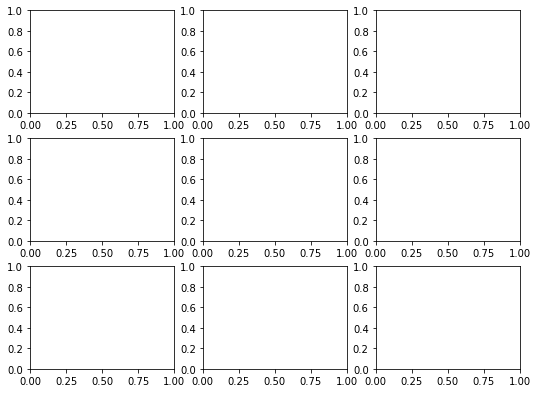

In [10]:

#runExp_simple(modelname="extendedmodel_covid.emodl", replaceParams=True)
#runExp_simple(modelname="temp_model.emodl")
df = reprocess(infile='trajectories_locale.csv')
plot(df)
   # plot_by_channel(df)

In [39]:
detected_plot(df, allchannels='infectious_Cook', chicago=True, save=False, plotname="detected_plot")

AttributeError: 'DataFrame' object has no attribute 'name'

<Figure size 576x432 with 0 Axes>

In [38]:
df['Ki']= 4.45e-6

In [11]:
fname = os.path.join('trajectories_locale.csv')
df = pd.read_csv(fname, skiprows=1)
df = df.set_index('sampletimes').transpose()
df = df.reset_index(drop=False)
df = df.rename(columns={'index' : 'time'})
df['time'] = df['time'].astype(float)

channels = [x for x in df.columns.values if '{' in x]
df = df.rename(columns={
    x : x.split('{')[0] for x in channels
})

# if output_fname :
#     df.to_csv(output_fname)

In [12]:
df

sampletimes,time,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,susceptible_Cook,...,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois,recovered_Illinois
0,0.000000,5223719,5223719,5223719,5223719,5223719,5223719,5223719,5223719,5223719,...,0,0,0,0,0,0,0,0,0,0
1,1.016949,5223670,5223689,5223665,5223692,5223700,5223666,5223687,5223622,5223692,...,4,4,1,2,0,0,1,2,3,3
2,2.033898,5223491,5223531,5223313,5223489,5223621,5223447,5223538,5223168,5223610,...,52,49,51,38,38,26,36,38,34,34
3,3.050847,5222633,5222534,5221544,5222293,5223216,5222022,5222683,5220279,5223074,...,736,771,795,766,805,589,686,855,637,621
4,4.067797,5217091,5216643,5211299,5215769,5220917,5213738,5217071,5202181,5219646,...,11594,12257,12702,11023,12148,9611,10460,13366,9968,9435
5,5.084746,5183602,5180233,5149511,5176170,5207468,5162272,5183660,5096919,5198918,...,83377,86279,88162,81197,85555,75352,78627,90527,76334,74570
6,6.101695,4991969,4970079,4796704,4945911,5128866,4865441,4989383,4518585,5078463,...,248689,253376,256902,244216,251804,234687,238874,259894,235657,233339
7,7.118644,4014716,3923696,3236053,3816252,4681037,3500019,4002771,2396991,4420895,...,490455,496086,500636,483687,494536,471379,478744,505676,473643,470329
8,8.135593,1405202,1282638,616236,1140026,2851319,819690,1387963,239345,2155482,...,792745,799200,803755,783835,796866,768267,777541,809645,771529,767669
9,9.152542,60115,48586,10465,37843,403967,18682,57841,1897,176896,...,1138495,1146650,1151326,1129477,1144298,1111773,1122549,1159244,1115800,1109523


In [19]:
#master_channel_list

list(df.columns.unique()[1:])

['susceptible_Cook',
 'exposed_Cook',
 'infectious_Cook',
 'recovered_Cook',
 'susceptible_DuPage',
 'exposed_DuPage',
 'infectious_DuPage',
 'recovered_DuPage',
 'susceptible_Illinois',
 'exposed_Illinois',
 'infectious_Illinois',
 'recovered_Illinois']

AttributeError: 'DataFrame' object has no attribute 'name'

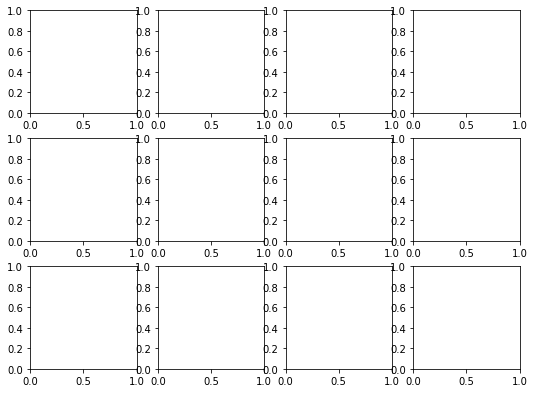

In [35]:
plot(df, allchannels = list(df.columns.unique()[1:]))


In [8]:

mpl.rcParams['pdf.fonttype'] = 42
Kivalues =  [4.45e-6]#np.random.uniform(5e-07, 5e-02 , 20)   # [9e-05, 7e-06, 8e-06, 9e-06, 9e-077]


In [7]:
trajectories

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,FrameworkVersion,1.0.176.23,clorton (CMS/Main/framework)
sampletimes,0,1.016949e+00,2.033898e+00,3.050847e+00,4.067797e+00,5.084746e+00,6.101695e+00,7.118644e+00,8.135593e+00,9.152542e+00,1.016949e+01,1.118644e+01,1.220339e+01,1.322034e+01,1.423729e+01,1.525424e+01,1.627119e+01,1.728814e+01,1.830508e+01,1.932203e+01,2.033898e+01,2.135593e+01,2.237288e+01,2.338983e+01,2.440678e+01,2.542373e+01,2.644068e+01,2.745763e+01,2.847458e+01,2.949153e+01,3.050847e+01,3.152542e+01,3.254237e+01,3.355932e+01,3.457627e+01,3.559322e+01,3.661017e+01,3.762712e+01,3.864407e+01,3.966102e+01,4.067797e+01,4.169492e+01,4.271186e+01,4.372881e+01,4.474576e+01,4.576271e+01,4.677966e+01,4.779661e+01,4.881356e+01,4.983051e+01,5.084746e+01,5.186441e+01,5.288136e+01,5.389831e+01,5.491525e+01,5.593220e+01,5.694915e+01,5.796610e+01,5.898305e+01,60
susceptible_Cook{0},5223719,5.223670e+06,5.223491e+06,5.222633e+06,5.217091e+06,5.183602e+06,4.991969e+06,4.014716e+06,1.405202e+06,6.011500e+04,2.110000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
susceptible_Cook{1},5223719,5.223689e+06,5.223531e+06,5.222534e+06,5.216643e+06,5.180233e+06,4.970079e+06,3.923696e+06,1.282638e+06,4.858600e+04,1.670000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
susceptible_Cook{2},5223719,5.223665e+06,5.223313e+06,5.221544e+06,5.211299e+06,5.149511e+06,4.796704e+06,3.236053e+06,6.162360e+05,1.046500e+04,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
susceptible_Cook{3},5223719,5.223692e+06,5.223489e+06,5.222293e+06,5.215769e+06,5.176170e+06,4.945911e+06,3.816252e+06,1.140026e+06,3.784300e+04,1.010000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000

In [19]:
reprocess(input_fname='trajectories_locale.csv', output_fname=None)

sampletimes,time,susceptible_Cook,exposed_Cook,infectious_Cook,recovered_Cook,susceptible_DuPage,exposed_DuPage,infectious_DuPage,recovered_DuPage,susceptible_Illinois,exposed_Illinois,infectious_Illinois,recovered_Illinois,sample_num
0,0.000000,5223719,0,1,0,931743,0,1,0,12671809,0,12,0,0
1,1.016949,5223670,47,3,0,931741,2,1,0,12669493,2206,118,4,0
2,2.033898,5223491,214,14,1,931733,9,2,0,12631481,38315,1973,52,0
3,3.050847,5222633,1002,81,4,931720,21,3,0,11999690,637335,34060,736,0
4,4.067797,5217091,6096,515,18,931702,35,5,2,5543196,6660919,456112,11594,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,55.932203,0,3512,433993,4786215,0,3738,156129,771877,0,4826,827378,11839617,8
536,56.949153,0,3003,408047,4812670,0,3196,147095,781453,0,4153,777599,11890069,8
537,57.966102,0,2582,383290,4837848,0,2745,138359,790640,0,3559,730427,11937835,8
538,58.983051,0,2195,360165,4861360,0,2373,130162,799209,0,3038,685422,11983361,8


In [18]:
def reprocess(input_fname='trajectories.csv', output_fname=None):
    fname = os.path.join(git_dir, input_fname)
    row_df = pd.read_csv(fname, skiprows=1)
    df = row_df.set_index('sampletimes').transpose()
    num_channels = len([x for x in df.columns.values if '{0}' in x])
    num_samples = int((len(row_df) - 1) / num_channels)

    df = df.reset_index(drop=False)
    df = df.rename(columns={'index': 'time'})
    df['time'] = df['time'].astype(float)

    adf = pd.DataFrame()
    for sample_num in range(num_samples):
        channels = [x for x in df.columns.values if '{%d}' % sample_num in x]
        sdf = df[['time'] + channels]
        sdf = sdf.rename(columns={
            x: x.split('{')[0] for x in channels
        })
        sdf['sample_num'] = sample_num
        adf = pd.concat([adf, sdf])

    adf = adf.reset_index()
    del adf['index']
    if output_fname:
        adf.to_csv(output_fname)
    return adf

In [15]:
def combineTrajectories(Nscenarios, deleteFiles=False):
    scendf = pd.read_csv("scenarios.csv", index_col=0)
    # order = scendf[ 'order'][1]

    #del scendf['order']
    #del scendf['Unnamed: 0']

    df_list = []
    for scen_i in range(1, Nscenarios):
        input_name ="trajectories_locale.csv"#"trajectories_scen" + str(scen_i) + ".csv"
        try:
            df_i = reprocess(input_name)
            df_i['scen_num'] = scen_i
            df_i = df_i.merge(scendf, on=['scen_num','sample_num'])
            df_list.append(df_i)
        except:
            continue

        if deleteFiles == True: os.remove(os.path.join(git_dir, input_name))

    dfc = pd.concat(df_list)
    dfc.to_csv("trajectoriesDat_locale.csv")
    return dfc

In [21]:
nscen = runExp(Kivalues, sub_samples=10)
combineTrajectories(nscen)

4.45e-06
4.45e-06
4.45e-06
4.45e-06
4.45e-06
4.45e-06
4.45e-06
4.45e-06
4.45e-06
4.45e-06


,time,susceptible_Cook,exposed_Cook,infectious_Cook,recovered_Cook,susceptible_DuPage,exposed_DuPage,infectious_DuPage,recovered_DuPage,susceptible_Illinois,exposed_Illinois,infectious_Illinois,recovered_Illinois,sample_num,scen_num,Ki
0,0.000000,5223719,0,1,0,931743,0,1,0,12671809,0,12,0,0,1,0.000004
1,1.016949,5223670,47,3,0,931741,2,1,0,12669493,2206,118,4,0,1,0.000004
2,2.033898,5223491,214,14,1,931733,9,2,0,12631481,38315,1973,52,0,1,0.000004
3,3.050847,5222633,1002,81,4,931720,21,3,0,11999690,637335,34060,736,0,1,0.000004
4,4.067797,5217091,6096,515,18,931702,35,5,2,5543196,6660919,456112,11594,0,1,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,55.932203,0,3512,433993,4786215,0,3738,156129,771877,0,4826,827378,11839617,8,9,0.000004
56,56.949153,0,3003,408047,4812670,0,3196,147095,781453,0,4153,777599,11890069,8,9,0.000004
57,57.966102,0,2582,383290,4837848,0,2745,138359,790640,0,3559,730427,11937835,8,9,0.000004
58,58.983051,0,2195,360165,4861360,0,2373,130162,799209,0,3038,685422,11983361,8,9,0.000004


In [22]:
def CI_5(x) :
    return np.percentile(x, 5)

def CI_95(x) :
    return np.percentile(x, 95)

def CI_25(x) :
    return np.percentile(x, 25)

def CI_75(x) :
    return np.percentile(x, 75)


In [37]:
def detected_plot(df, allchannels='detected', chicago=True, save=False, plotname="detected_plot"):
    
    """
    plotting function for plotting the detected channel from a trajectories_dat.
    
    inputs:
    df: trajectoriesDat dataframe (pd.dataframe)
    allchannels: single channel name to plot (string, optional)
    chicago: boolean to compare to the chicago_df data (bool, optional)
    save: boolean to save resulting plot (bool, optional)
        plotname: name of saved plot
    """
    #copy dataset and define pallet/fig
    adf= df.copy()
    fig = plt.figure(figsize=(8,6))
    palette = sns.color_palette('Set1', 10)
    
    #make composite key (time,Ki) aggregation for mean and confidence intervals
    mdf = adf.groupby(['time','Ki'])[allchannels].agg([np.mean, CI_5, CI_95, CI_25, CI_75]).reset_index()
    #convert time to dates based off firstday
    mdf['dates']= pd.to_datetime([first_day + timedelta(days=int(x)) for x in mdf['time']])
    
    ## boolean logic to merge chicago dataset in
    if chicago==True:
        mdf=pd.merge(mdf,
                     chicago_df[["Date",'confirmed_cases','cumulative_cases_calc']],
                     left_on='dates',
                     right_on='Date',how='left' )

    ##automating accounting if Ki is >1. if so, plot each Ki independnely, and don't fill in confidence intervals
    if len(df['Ki'].unique())>1:
        
        for element in range(0, len(mdf['Ki'].unique())):
            plt.plot(mdf.loc[(mdf['Ki']==mdf['Ki'].unique()[element]),'dates'],
                     mdf.loc[(mdf['Ki']==mdf['Ki'].unique()[element]),'mean'],
                     label='detected_SEIR_Ki={}'.format(mdf['Ki'].unique()[element]),
                     color=palette[element])
    
    else:
        plt.plot(mdf['dates'], mdf['mean'], label='detected_SEIR', color=palette[0])
        plt.fill_between(mdf['dates'], mdf['CI_5'], mdf['CI_95'],
                        color=palette[0], linewidth=0, alpha=0.2)
        plt.fill_between(mdf['dates'], mdf['CI_25'], mdf['CI_75'],
                        color=palette[0], linewidth=0, alpha=0.4)
        plt.plot(mdf['dates'], mdf['cumulative_cases_calc'], label='detected_reported', color=palette[1])


    #if chicago is true, plot the chicago data
    if chicago==True:
        plt.plot(mdf['dates'], mdf['cumulative_cases_calc'], label='detected_reported')#, color=palette[element+1])

    plt.title('confirmed_cases')#, y=0.8)
    plt.legend()

    ax = plt.gca()

    formatter = mdates.DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.set_xlim(first_day, )
    
    if save==True:
        plt.savefig(os.path.join(plot_path, '{}.png'.format(plotname)))
    plt.show()

    
    
def plot(adf, allchannels = master_channel_list, save=False) :
    """
    Manuela's origional plotting function
    """
    fig = plt.figure(figsize=(8,6))
    palette = sns.color_palette('Set1', 10)

    axes = [fig.add_subplot(3,3,x+1) for x in range(len(allchannels))]
    fig.subplots_adjust(bottom=0.05, hspace=0.25, right=0.95, left=0.1)
    for c, channel in enumerate(allchannels) :

        mdf = adf.groupby('time')[channel].agg([np.mean, CI_5, CI_95, CI_25, CI_75]).reset_index()
        ax = axes[c]
        dates = [first_day + timedelta(days=int(x)) for x in mdf['time']]
        ax.plot(dates, mdf['mean'], label=channel, color=palette[c])
        ax.fill_between(dates, mdf['CI_5'], mdf['CI_95'],
                        color=palette[c], linewidth=0, alpha=0.2)
        ax.fill_between(dates, mdf['CI_25'], mdf['CI_75'],
                        color=palette[c], linewidth=0, alpha=0.4)

        ax.set_title(channel, y=0.8)

        formatter = mdates.DateFormatter("%m-%d")
        ax.xaxis.set_major_formatter(formatter)
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.set_xlim(first_day, )
        
        if save==True:
            plt.savefig(os.path.join(plot_path, 'sample_plot.png'))
    plt.show()
    

In [ ]:
    ### data reading
chicago_df= df= pd.read_csv(
        os.path.join(project_dir,'chicago/chicago_cases.csv'),
        index_col=0)
chicago_df= chicago_df.reset_index()#.head()
chicago_df['Date']=pd.to_datetime(chicago_df['Date'])

# df= pd.read_csv(
#         os.path.join(project_dir,'fitting/trajectoriesDat_v5.csv'),
#         index_col=0)

###run the plot function:



In [28]:
nscen = runExp(Kivalues, sub_samples=10)
combineTrajectories(nscen)
df = pd.read_csv(os.path.join('trajectoriesDat_locale.csv'),index_col=0)

4.45e-06
4.45e-06
4.45e-06
4.45e-06
4.45e-06
4.45e-06
4.45e-06
4.45e-06
4.45e-06
4.45e-06


In [29]:
df

,time,susceptible_Cook,exposed_Cook,infectious_Cook,recovered_Cook,susceptible_DuPage,exposed_DuPage,infectious_DuPage,recovered_DuPage,susceptible_Illinois,exposed_Illinois,infectious_Illinois,recovered_Illinois,sample_num,scen_num,Ki
0,0.000000,5223719,0,1,0,931743,0,1,0,12671809,0,12,0,0,1,0.000004
1,1.016949,5223670,47,3,0,931741,2,1,0,12669493,2206,118,4,0,1,0.000004
2,2.033898,5223491,214,14,1,931733,9,2,0,12631481,38315,1973,52,0,1,0.000004
3,3.050847,5222633,1002,81,4,931720,21,3,0,11999690,637335,34060,736,0,1,0.000004
4,4.067797,5217091,6096,515,18,931702,35,5,2,5543196,6660919,456112,11594,0,1,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,55.932203,0,3512,433993,4786215,0,3738,156129,771877,0,4826,827378,11839617,8,9,0.000004
56,56.949153,0,3003,408047,4812670,0,3196,147095,781453,0,4153,777599,11890069,8,9,0.000004
57,57.966102,0,2582,383290,4837848,0,2745,138359,790640,0,3559,730427,11937835,8,9,0.000004
58,58.983051,0,2195,360165,4861360,0,2373,130162,799209,0,3038,685422,11983361,8,9,0.000004


In [26]:
#detected_plot(df, allchannels='detected', chicago=True, save=True, plotname='detection_plot')


KeyError: 'Column not found: detected'

<Figure size 576x432 with 0 Axes>

In [31]:
master_channel_list = ['susceptible', 'exposed', 'infectious', 'symptomatic', 'detected',
                       'hospitalized', 'critical', 'death', 'recovered']

list(df)

['time',
 'susceptible_Cook',
 'exposed_Cook',
 'infectious_Cook',
 'recovered_Cook',
 'susceptible_DuPage',
 'exposed_DuPage',
 'infectious_DuPage',
 'recovered_DuPage',
 'susceptible_Illinois',
 'exposed_Illinois',
 'infectious_Illinois',
 'recovered_Illinois',
 'sample_num',
 'scen_num',
 'Ki']

In [34]:
list(df)[1:5]

['susceptible_Cook', 'exposed_Cook', 'infectious_Cook', 'recovered_Cook']

In [35]:
list(df)[1+4:5+4]

['susceptible_DuPage',
 'exposed_DuPage',
 'infectious_DuPage',
 'recovered_DuPage']

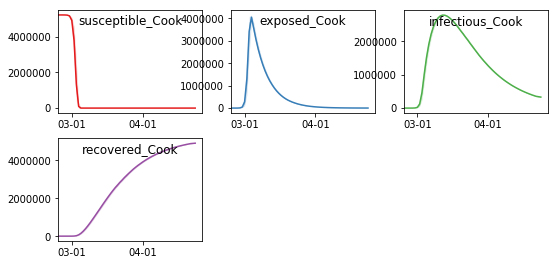

In [38]:
plot(df, allchannels=list(df)[1:5])

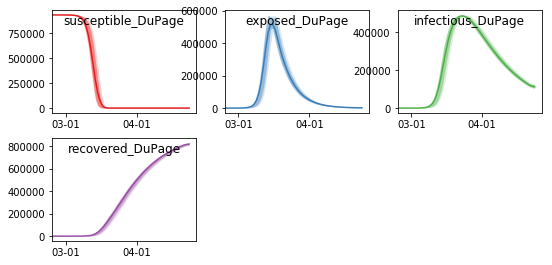

In [39]:
plot(df, allchannels=list(df)[1+4:5+4])

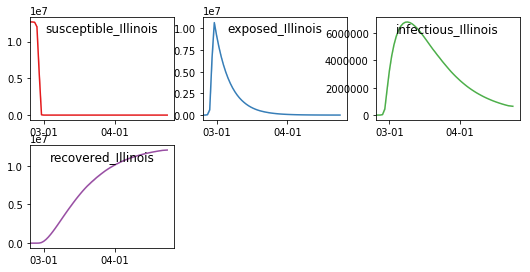

In [40]:
plot(df, allchannels=list(df)[1+8:5+8])

In [ ]:
detected_plot(df, allchannels='detected', chicago=True, save=False, plotname="detected_plot")

In [16]:
nscen = runExp(Kivalues, sub_samples=10)
combineTrajectories(nscen)

df = pd.read_csv(os.path.join('trajectoriesDat_locale.csv'))
#df.params.unique()
#df= df[df['params'] == 9.e-05]
plot(df, allchannels=master_channel_list)

4.45e-06
4.45e-06
4.45e-06
4.45e-06
4.45e-06
4.45e-06
4.45e-06
4.45e-06
4.45e-06
4.45e-06


ValueError: No objects to concatenate

In [ ]:
def reprocess(input_fname='trajectories.csv', output_fname=None):
    """
    this function combines trajectories, since individual traj files are not useful on their own. 
    """
    
    fname = os.path.join(git_dir, input_fname)
    row_df = pd.read_csv(fname, skiprows=1)
    df = row_df.set_index('sampletimes').transpose()
    num_channels = len([x for x in df.columns.values if '{0}' in x])
    num_samples = int((len(row_df) - 1) / num_channels)

    df = df.reset_index(drop=False)
    df = df.rename(columns={'index': 'time'})
    df['time'] = df['time'].astype(float)

    adf = pd.DataFrame()
    for sample_num in range(num_samples):
        channels = [x for x in df.columns.values if '{%d}' % sample_num in x]
        sdf = df[['time'] + channels]
        sdf = sdf.rename(columns={
            x: x.split('{')[0] for x in channels
        })
        sdf['sample_num'] = sample_num
        adf = pd.concat([adf, sdf])

    adf = adf.reset_index()
    del adf['index']
    if output_fname:
        adf.to_csv(os.path.join(sim_output_path,output_fname))
    return adf

In [ ]:
### data management. these are SAME for any emodl
def reprocess(input_fname='trajectories.csv', output_fname=None):
    """
    this function combines trajectories, since individual traj files are not useful on their own. 
    """

    fname = os.path.join(git_dir, input_fname)
    row_df = pd.read_csv(fname, skiprows=1)
    df = row_df.set_index('sampletimes').transpose()
    num_channels = len([x for x in df.columns.values if '{0}' in x])
    num_samples = int((len(row_df) - 1) / num_channels)

    df = df.reset_index(drop=False)
    df = df.rename(columns={'index': 'time'})
    df['time'] = df['time'].astype(float)

    adf = pd.DataFrame()
    for sample_num in range(num_samples):
        channels = [x for x in df.columns.values if '{%d}' % sample_num in x]
        sdf = df[['time'] + channels]
        sdf = sdf.rename(columns={
            x: x.split('{')[0] for x in channels
        })
        sdf['sample_num'] = sample_num
        adf = pd.concat([adf, sdf])

    adf = adf.reset_index()
    del adf['index']
    if output_fname:
        adf.to_csv(os.path.join(sim_output_path,output_fname))
    return adf


def combineTrajectories(Nscenarios,sim_output_path, deleteFiles=False):
    scendf = pd.read_csv("scenarios.csv", index_col=0)
    #del scendf['Unnamed: 0']

    df_list = []
    for scen_i in range(1, Nscenarios):
        input_name = "trajectories_scen" + str(scen_i) + ".csv"
        try:
            df_i = reprocess(input_name)
            df_i['scen_num'] = scen_i
            df_i = df_i.merge(scendf, on=['scen_num','sample_num'])
            df_list.append(df_i)
        except:
            continue

        if deleteFiles == True: os.remove(os.path.join(git_dir, input_name))

    dfc = pd.concat(df_list)
    dfc.to_csv( os.path.join(sim_output_path,"trajectoriesDat.csv"))

    return dfc